## Км4

1. Средствами SymPy решите дифференциальное уравнение:
$\frac{d^3u(t)}{dt^3} = -u(t) + sin(t)$ При следующих начальных условиях: $u(0)=1, \frac{du(0)}{dt}=1, \frac{d^2u(1)}{dt^2}=0, a=1$. Постройке график зависимости u(t) на отрезке t [0, 5]
2. На занятии мы анализировали открытые данные по эпидемии Covid-19, распространяемые worldometers. Загрузите актуальные данные. Постройте DataFrame, содержащие по 10 стран с наиболее высоким и наиболее низким уровнем заболеваемости на миллион жителей. Постарайтесь сделать это без циклов. Новый DataFrame должен содержать столбцы с удельными данными на миллион населения. Постройте графики распределения показателей по странам на одном графике.

### Задание 1

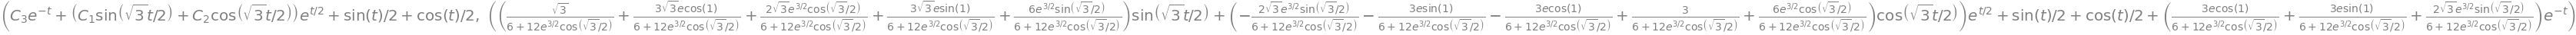

In [55]:
from sympy import init_printing, Eq, dsolve, symbols, Function, sin
import numpy as np
import matplotlib.pyplot as plt
init_printing()


t = symbols('t')
u = Function('u')

eq = Eq(u(t).diff(t, 3), -u(t) + sin(t))
sol1 = dsolve(eq, u(t)).rhs
#Начальные условия
c_0 = Eq(sol1.subs(t, 0), 1)
c_1 = Eq(sol1.diff(t).subs(t, 0), 1)
c_2 = Eq(sol1.diff(t, 2).subs(t, 1), 0)

C1, C2, C3 = symbols('C1, C2, C3')
C1C2C3_sl = solve([c_0, c_1, c_2], (C1, C2, C3))
sol2 = sol1.subs(C1C2C3_sl)
sol1, sol2

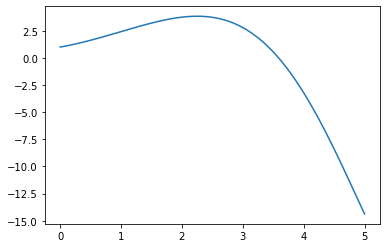

In [56]:
def draw_root(u, a=0, b=5, n=100):
    tt = np.linspace(a, b, n)
    uu = lambdify(t, u, 'numpy')(tt)
    plt.plot(tt, uu)
    plt.show()


draw_root(sol2)

### Задание 2

In [101]:
import pandas as pd
import covid


covid_world = covid.Covid(source='worldometers').get_data()
df = pd.DataFrame(covid_world)
not_country = ('North America', 'Asia', 'South America', 'Europe', 'Africa', 'World', 'South Africa', 'Oceania', '0')
df1 = df[~df.country.isin(not_country)].sort_values(by='total_cases_per_million', ascending=False).head(10)
df1 = df1[['country', 'total_tests_per_million', 'total_cases_per_million', 'total_deaths_per_million']]
df2 = df[~df.country.isin(not_country)].sort_values(by='total_cases_per_million', ascending=True).head(10)
df2 = df2[['country', 'total_tests_per_million', 'total_cases_per_million', 'total_deaths_per_million']]
df1

,country,total_tests_per_million,total_cases_per_million,total_deaths_per_million
161,Andorra,0,385871,1833
186,Gibraltar,0,333066,2970
110,Montenegro,0,331383,3969
156,Seychelles,0,330815,1410
187,San Marino,0,312535,3026
212,St. Barth,0,294942,605
159,Aruba,0,294072,1740
75,Slovenia,0,268980,2752
55,Georgia,0,255345,3659
31,Czechia,0,246998,3439


In [103]:
df2

,country,total_tests_per_million,total_cases_per_million,total_deaths_per_million
224,MS Zaandam,0,0,0
214,Diamond Princess,0,0,0
229,Micronesia,0,9,0
230,Tonga,0,9,0
227,Samoa,0,15,0
223,Western Sahara,0,16,2
225,Vanuatu,0,22,3
221,Solomon Islands,0,45,0
231,China,0,73,3
226,Marshall Islands,0,117,0


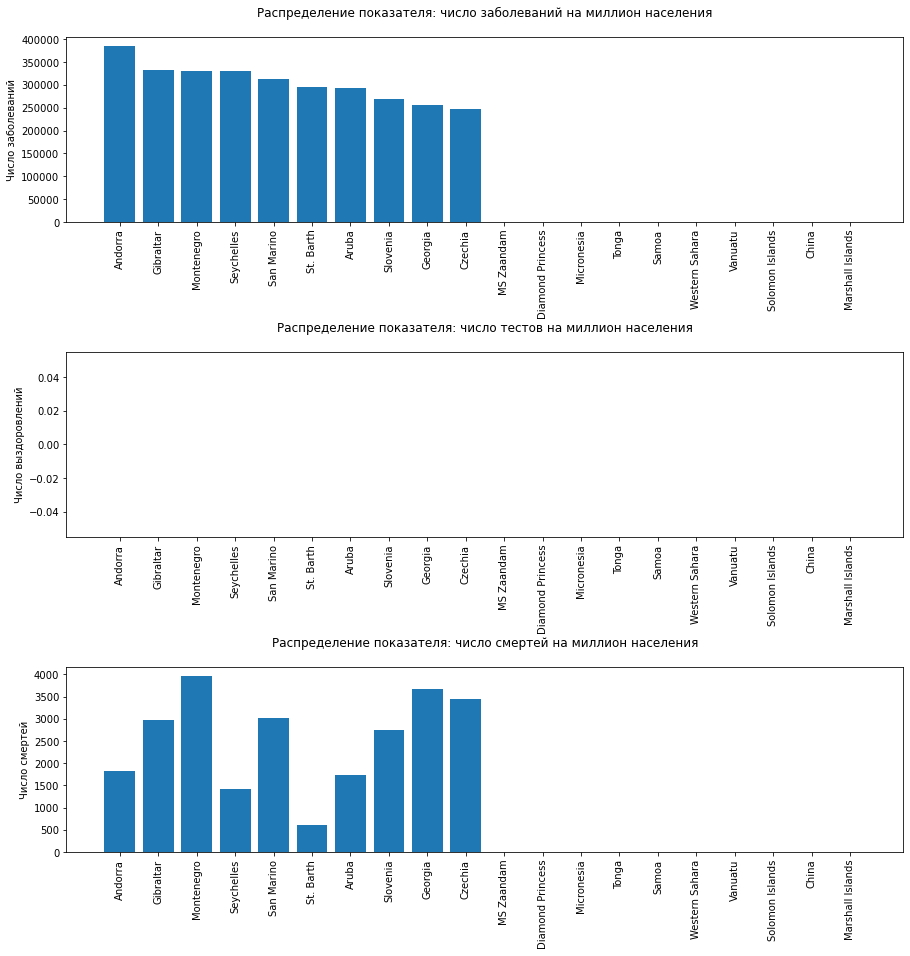

In [104]:
fig = plt.figure(figsize=(15, 15))
ax1, ax2, ax3 = fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)
ax1.set_title('Распределение показателя: число заболеваний на миллион населения', pad=20)
ax1.set_ylabel('Число заболеваний')
ax1.bar(list(df1.country)+list(df2.country), list(df1.total_cases_per_million)+list(df2.total_cases_per_million))
ax2.set_title('Распределение показателя: число тестов на миллион населения', pad=20)
ax2.set_ylabel('Число выздоровлений')
ax2.bar(list(df1.country)+list(df2.country), list(df1.total_tests_per_million)+list(df2.total_tests_per_million))
ax3.set_title('Распределение показателя: число смертей на миллион населения', pad=20)
ax3.set_ylabel('Число смертей')
ax3.bar(list(df1.country)+list(df2.country), list(df1.total_deaths_per_million)+list(df2.total_deaths_per_million))
ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)
plt.subplots_adjust(hspace=0.7)
plt.show()